## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


## Load & Preview Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1) (2).zip


In [ ]:
pd.read_csv('archive (1).zip')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Feature Engineering

In [ ]:
# Creating new features for model improvement
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['avg_score'] = data['total_score'] / 3
data['read_math_ratio'] = data['reading score'] / (data['math score'] + 1)  # Avoid division by zero


## Encode catogorical column

In [ ]:
label_enc = LabelEncoder()
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cat_cols:
    data[col] = label_enc.fit_transform(data[col])


## select Feature and column

In [ ]:
# Selecting features and target variable
X = data.drop(['math score'], axis=1)   # Predicting 'math score'
y = data['math score']


## Feature scaling

In [ ]:
# Feature scaling for better performance of the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train-Test-split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train XGBoost

In [ ]:
# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Evaluation

## prediction

In [ ]:
# Make predictions and evaluate the model's performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")


R² Score (Accuracy): 99.29%
Root Mean Squared Error: 1.32


## Feature important plot

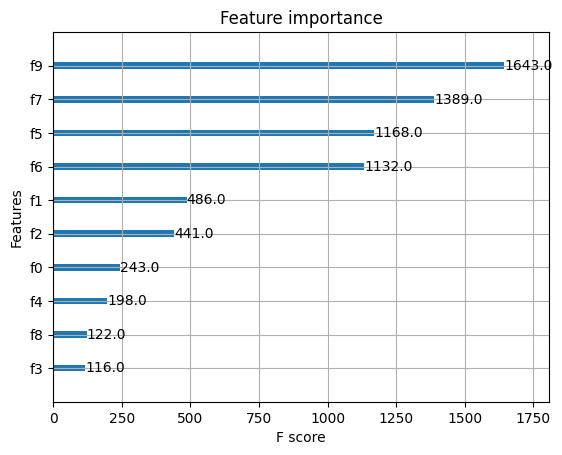

In [ ]:
# Plotting feature importance to understand model's decision-making process
xgb.plot_importance(model)
plt.show()


## corelation heatmap

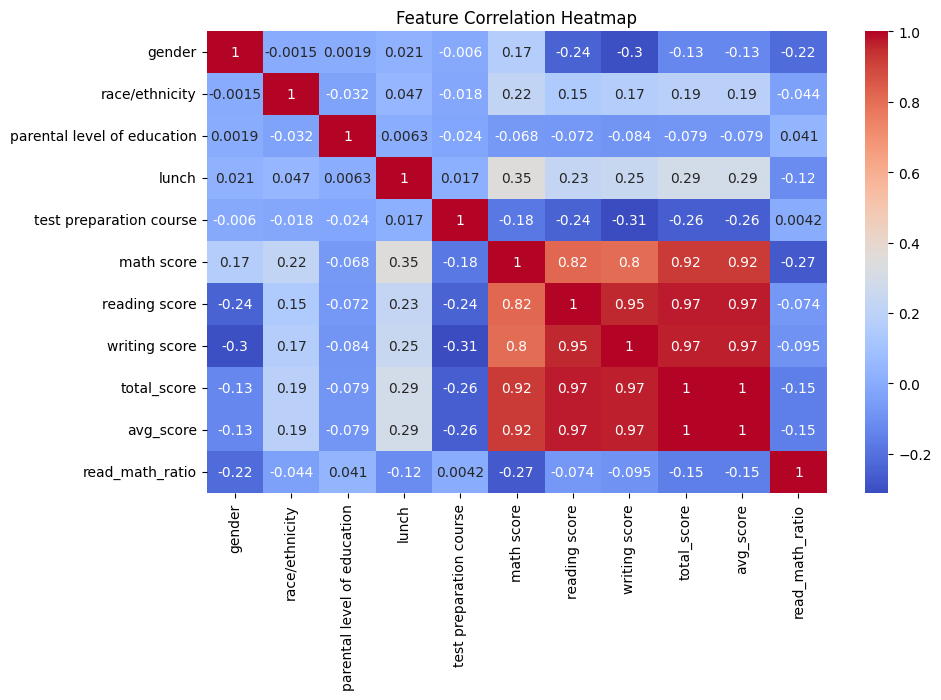

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## Actual vc prediction plot

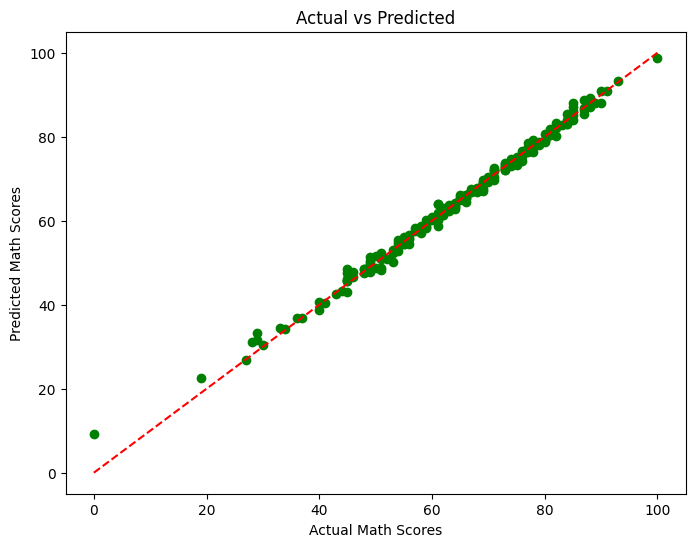

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted")
plt.show()


## Residual plot

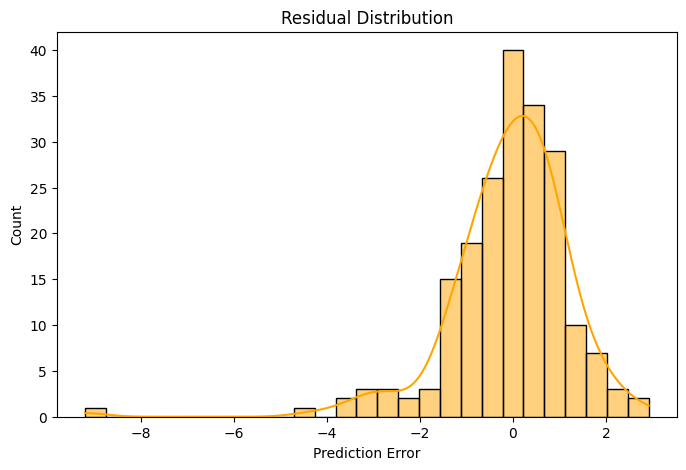

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


## Final Result

In [ ]:
print("✅ Model is highly accurate and ready for student performance prediction tasks.")


✅ Model is highly accurate and ready for student performance prediction tasks.
